# 泰坦尼克号-灾难中的机器学习（逻辑回归）

![](./../img/1.png)

**其他练习：**

信用卡欺诈检测: https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud

电信客户流失: https://www.kaggle.com/datasets/blastchar/telco-customer-churn

## 一、数据集描述

|     特征      |    定义     |                                   其他                                    |
|:-----------:|:---------:|:-----------------------------------------------------------------------:|
| PassengerId |    ID     |                                    \                                    |
|  Survived   |   是否幸存    |                            	0 = No, 1 = Yes                             |
|   Pclass    |    票类     |           	1 = 1st (Upper), 2 = 2nd (Middle), 3 = 3rd (Lower)           |
|    Name     |    姓名     |                                    \                                    |
|     Sex     |    性别     |                           male 男性, female 女性                            |
|     Age     |    年龄     |                              如果年龄小于1，则为小数                               |
|    SibSp    | 兄弟姐妹/配偶人数 |          兄弟姐妹 = 兄弟 + 姐妹 + 继兄弟 + 继姐妹<br/>配偶 = 丈夫 + 妻子（情妇和未婚夫除外）          |
|    Parch    |   父母/孩子   | 父母 = 母亲 + 父亲<br/>孩子 = 女儿 + 儿子 + 继女 + 继子<br/>有些孩子只和保姆一起旅行，因此对他们来说parch=0 |
|   Ticket    |   船票号码    |                                用于区分不同的乘客                                |
|    Fare     |    票价     |                                   英镑                                    |
|    Cabin    |    舱室     |                                乘客所住的船舱编号                                |
|  Embarked   |   登船港口    |             C = Cherbourg, Q = Queenstown, S = Southampton              |

**数据初步考量：**
1. Passenferid：记录ID
2. Survived：目标值 (target)
3. Pclass：反映了当时各乘客的社会地位
4. Name：姓名的前缀中可能存在着潜在的年龄、社会地位或家庭关系
5. Sex：使用 1 代表 male，使用 0 代表 female。
6. Age：可以代表个体的生存能力
7. SibSp | Parch：家庭团体，对生存具有一定影响。
8. Ticket | Fare | Cabin：这三者也有一定地联系，票号反映了不同的团体，票价反映了社会地位。但有些人购买了多个舱室，其Fare也很高。
9. Embarked：能够了解每个乘客大概来自哪些地方

## 二、数据预处理

需要处理缺失值，去除无用值，可能需要转变文本值为数值和使用组合特征值。

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# 读取数据
df1 = pd.read_csv('./../data/train.csv')

In [3]:
df2 = pd.read_csv('./../data/test.csv')

In [4]:
df1

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [5]:
df2

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [6]:
n1 = df1.shape[0]
n1

891

In [7]:
n2 = df2.shape[0]
n2

418

### df1 处理缺失值

**确认缺失特征：**

In [8]:
lack = [k for k in df1.columns if df1[k].isna().any()]
lack

['Age', 'Cabin', 'Embarked']

#### 处理 'Age' 缺失：

使用平均数、中位数或众数？

In [9]:
df1['Age'].isna().astype(int).sum()

np.int64(177)

***共缺失 177 条年龄数据，而整体有 891 条数据，缺少近 20% ，对于预测来说这是不容小觑的。***

因此单纯使用中位数等可能会导致最终预测效果不好，需要更加精准地填补缺失方式。

***使用与年龄有关联的姓名称谓进行分组平均数填充***

**单独取出 'Name' 和 'Age' 进行处理**

In [10]:
df_name_age = df1[['Name', 'Age']].copy()
df_name_age

,Name,Age
0,"Braund, Mr. Owen Harris",22.0
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0
2,"Heikkinen, Miss. Laina",26.0
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0
4,"Allen, Mr. William Henry",35.0
...,...,...
886,"Montvila, Rev. Juozas",27.0
887,"Graham, Miss. Margaret Edith",19.0
888,"Johnston, Miss. Catherine Helen ""Carrie""",NaN
889,"Behr, Mr. Karl Howell",26.0


**直接取出每个人的称谓为一列**

In [11]:
df_name_age['Name'] = df_name_age['Name'].map(lambda x: x.split(',')[1].split('.')[0].strip())
df_name_age

,Name,Age
0,Mr,22.0
1,Mrs,38.0
2,Miss,26.0
3,Mrs,35.0
4,Mr,35.0
...,...,...
886,Rev,27.0
887,Miss,19.0
888,Miss,NaN
889,Mr,26.0


**对每种称谓进行分组聚合取平均**

In [12]:
age_nan_values = df_name_age.groupby('Name').mean().round()
age_nan_values

,Age
Name,
Capt,70.0
Col,58.0
Don,40.0
Dr,42.0
Jonkheer,38.0
Lady,48.0
Major,48.0
Master,5.0
Miss,22.0


***各个称谓所代表的含义***

|         称谓         |            含义             |
|:------------------:|:-------------------------:|
|   Capt（Captain）    |      船长、上尉（海军或陆军军衔）       |
|    Col（Colonel）    |         上校（高级军官）          |
|        Don         |    西班牙语中对男性的尊称（类似“先生”）    |
|     Dr（Doctor）     |           博士或医生           |
|      Jonkheer      |   荷兰低阶贵族头衔，意为“阁下”或“少爷”    |
|        Lady        | 英国女性贵族头衔（如伯爵夫人），或对女性的礼貌称呼 |
|       Major        |         少校（中级军官）          |
|       Master       |        旧时对未成年男孩的称呼        |
|        Miss        |           未婚女性            |
| Mlle（Mademoiselle） |      法语中的“小姐”（未婚女性）       |
|    Mme（Madame）     |     法语中的“夫人”（已婚或年长女性）     |
|     Mr（Mister）     |         成年男性的通用称呼         |
|    Mrs（Missus）     |        已婚女性，传统上随夫姓        |
|         Ms         |    女性通用称呼，婚姻状况不明或不愿透露     |
|   Rev（Reverend）    |          牧师或神职人员          |
|        Sir         |         对骑士或男爵的尊称         |
|    the Countess    |         女伯爵或伯爵夫人          |

**填充缺失值并赋值给 df1**

In [13]:
# apply() 用于对 Series 或 DataFrame 的数据进行逐元素、逐行或逐列的批量处理
# df1['Age'] = df_name_age.apply(
#     lambda x: age_nan_values.loc[x['Name']].values[0] if pd.isna(x['Age']) else x['Age'], 
#     axis=1
# )
# TODO itertuples() 速度更快，是 apply() 的三倍
# loc[] 直接索引值，pd.isna() 判断pandas数据是否为空
age = []
for row in df_name_age.itertuples(index=False):
    if pd.isna(row[1]):
        age.append(age_nan_values.loc[row[0]].values[0])
    else:
        age.append(row[1])
df1['Age'] = pd.Series(age)
df1

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,22.0,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


#### 处理 'Cabin' 缺失：

如何填补？是否需要这个特征值？

In [14]:
df1['Cabin'].isna().astype(int).sum()

np.int64(687)

***共缺失 687 条年龄数据，而整体有 891 条数据，缺少 77% ，对于预测来说这是场灾难！***

我们无法通过 票号(Ticket) 和 票价(Fare) 等信息找出潜在规律，从而得出 舱室(Cabin) 信息，虽然其特征可能反映出当时的层数，这对预测有一定地帮助，但其信息缺失过多也无从考究。

我能够得出的是：舱室的购买是按照家庭记录的，同一个家庭其 Ticket | Fare | Cabin 信息一致。

***因此暂时放弃填补对 'Cabin' 缺失填补，先将此特征去除。***

In [15]:
df1 = df1.drop(['Cabin'], axis=1)
df1

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,22.0,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


#### 处理 'Embarked' 缺失：

只有三个类别，可通过乘客姓氏对其进行判断

In [16]:
df1['Embarked'].isna().astype(int).sum()

np.int64(2)

***上一次是灾难，但这一次是幸运的，只存在 2 条缺失值。***

我们可以直接通过搜索确定其出发地

In [17]:
df1[df1['Embarked'].isna()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,NaN


值得注意的是，这两位 ID 不同的女性，她们 票号(Ticket) 以及 票价(Fare) 竟然是一样的，但她们之间并不是家庭关系。

这也反映了当时的 **主仆共用团体票** 的历史实际情况，此类现象在头等舱乘客中较为常见，尤其是携带仆人或旅伴的富裕家庭。

根据她们的姓氏推测：（AI网络搜索）

- Icard, Miss. Amelie ：法国雇佣女仆
- Stone, Mrs. George Nelson (Martha Evelyn) ：美国社交名流

二人乘坐泰坦尼克号返回美国，大概率是从 **法国瑟堡(C)** 登船（泰坦尼克号在瑟堡接载了 274 名乘客，多为头等舱）

In [18]:
df1['Embarked'] = df1['Embarked'].fillna('C')
df1.iloc[61]

PassengerId                     62
Survived                         1
Pclass                           1
Name           Icard, Miss. Amelie
Sex                         female
Age                           38.0
SibSp                            0
Parch                            0
Ticket                      113572
Fare                          80.0
Embarked                         C
Name: 61, dtype: object

### df1 去除无用值

哪些值对生存预测的无影响或影响较小？

**1. PassengerId**

这对预测并没有什么作用。

**2. Name**

In [19]:
df_name_age.groupby('Name').count()

,Age
Name,
Capt,1
Col,2
Don,1
Dr,6
Jonkheer,1
Lady,1
Major,2
Master,36
Miss,146


含有特殊称谓的人数较少，且社会地位高的人可能也会被称呼为 Mr、Mrs、Miss

***因此虽然其在填补缺失值中作用显著，但对于生存预测来说并没有太大帮助。***

**3. Ticket**

***先取出所有票号的数字号码***

In [20]:
df1['Ticket'] = df1['Ticket'].map(lambda x: x.split(' ')[-1] if x != 'LINE' else 300000).astype(int)

In [21]:
print(df1['Ticket'].min())
print(df1['Ticket'].max())
df1.head()

3
3101317


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


***找出三种票型的数字规律***

In [22]:
# 单独取出票型和票号两类特征值
ticket = df1[['Pclass', 'Ticket', 'Survived']].copy()
ticket

,Pclass,Ticket,Survived
0,3,21171,0
1,1,17599,1
2,3,3101282,1
3,1,113803,1
4,3,373450,0
...,...,...,...
886,2,211536,0
887,1,112053,1
888,3,6607,0
889,1,111369,1


In [23]:
# 将数字号码分为 311 个区间
ticket_range = np.linspace(0, 3110000, 312)
ticket['Ticket_layer'] = pd.cut(ticket['Ticket'], bins=ticket_range)
ticket_ = ticket.groupby('Ticket_layer', observed=True).agg({'Pclass': 'mean', 'Survived': 'sum', 'Ticket': 'count'})
ticket_['Survival_Rate'] = ticket_['Survived'] / ticket_['Ticket']
ticket_

,Pclass,Survived,Ticket,Survival_Rate
Ticket_layer,,,,
"(0.0, 10000.0]",2.781609,55,174,0.316092
"(10000.0, 20000.0]",1.261745,97,149,0.651007
"(20000.0, 30000.0]",2.066667,17,45,0.377778
"(30000.0, 40000.0]",1.930233,24,43,0.558140
"(40000.0, 50000.0]",3.000000,0,3,0.000000
"(50000.0, 60000.0]",3.000000,0,3,0.000000
"(60000.0, 70000.0]",3.000000,1,3,0.333333
"(110000.0, 120000.0]",1.000000,37,72,0.513889
"(210000.0, 220000.0]",2.000000,0,3,0.000000


***票号特征显得有些杂乱无章，寻找规律后可以发现，数字基本满足：***
- 头等舱票号区间：**(10000, 20000]** 和 **(110000, 120000]**
- 二等舱票号区间：**(20000, 40000]** 和 **(210000, 260000]**
- 三等舱票号区间：**(0, 10000]** 、 **(40000, 70000]** 、 **(260000, 400000]** 和 **(3100000, 3110000]**

间接影响生存的特征，暂时保留

**4. Embarked**

In [24]:
embarked = df1.groupby('Embarked').agg({'Survived': 'sum', 'Pclass' :'mean', 'Embarked': 'count'})
embarked['Survival_Rate'] = embarked['Survived'] / embarked['Embarked']
embarked

,Survived,Pclass,Embarked,Survival_Rate
Embarked,,,,
C,95,1.876471,170,0.558824
Q,30,2.909091,77,0.389610
S,217,2.350932,644,0.336957


***C 港口的乘客中 头等舱 占比较高***

***C 港口乘客的生存率约为 55%，高于 S 港口的 34% 和 Q 港口的 39%***

间接影响生存的特征，暂时保留

**去除 PassengerId 和 Name 两个特征值**

In [25]:
df1 = df1.drop(['PassengerId', 'Name'], axis=1)
df1

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,male,22.0,1,0,21171,7.2500,S
1,1,1,female,38.0,1,0,17599,71.2833,C
2,1,3,female,26.0,0,0,3101282,7.9250,S
3,1,1,female,35.0,1,0,113803,53.1000,S
4,0,3,male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,211536,13.0000,S
887,1,1,female,19.0,0,0,112053,30.0000,S
888,0,3,female,22.0,1,2,6607,23.4500,S
889,1,1,male,26.0,0,0,111369,30.0000,C


### df1 转变文本值为数值

**1. Sex**

male = 1, female = 0

In [26]:
df1['Sex'] = (df1['Sex'] == 'male').astype(int)
df1

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,1,22.0,1,0,21171,7.2500,S
1,1,1,0,38.0,1,0,17599,71.2833,C
2,1,3,0,26.0,0,0,3101282,7.9250,S
3,1,1,0,35.0,1,0,113803,53.1000,S
4,0,3,1,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,211536,13.0000,S
887,1,1,0,19.0,0,0,112053,30.0000,S
888,0,3,0,22.0,1,2,6607,23.4500,S
889,1,1,1,26.0,0,0,111369,30.0000,C


**2. Embarked**

间接影响生存的特征，暂时不进行文本转换

### df1 使用组合特征值

**1. SibSp | Parch**

组合为家庭 (Family)

我们知道，舱室的购买是按照家庭记录的，同一个家庭其 Ticket | Fare | Cabin 信息一致。

也就是说，船票的购买是以家庭为单位的，因此将 SibSp | Parch 组合为 Family 。

In [27]:
df1['Family'] = df1['SibSp'] + df1['Parch'] + 1
df1 = df1.drop(['SibSp', 'Parch'], axis=1)
df1

,Survived,Pclass,Sex,Age,Ticket,Fare,Embarked,Family
0,0,3,1,22.0,21171,7.2500,S,2
1,1,1,0,38.0,17599,71.2833,C,2
2,1,3,0,26.0,3101282,7.9250,S,1
3,1,1,0,35.0,113803,53.1000,S,2
4,0,3,1,35.0,373450,8.0500,S,1
...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,211536,13.0000,S,1
887,1,1,0,19.0,112053,30.0000,S,1
888,0,3,0,22.0,6607,23.4500,S,4
889,1,1,1,26.0,111369,30.0000,C,1


***简单探索***

In [28]:
family = df1.groupby('Family').agg({'Survived': 'sum', 'Family': 'count', 'Pclass': 'mean', 'Fare': 'mean'})
family['Survival_Rate'] = family['Survived'] / family['Family']
family['Single_mean_Fare'] = family['Fare'] / family.index
family

,Survived,Family,Pclass,Fare,Survival_Rate,Single_mean_Fare
Family,,,,,,
1,163,537,2.400372,21.242689,0.303538,21.242689
2,89,161,1.919255,49.894129,0.552795,24.947064
3,59,102,2.225490,39.692482,0.578431,13.230827
4,21,29,2.068966,54.864510,0.724138,13.716128
5,3,15,2.666667,58.094453,0.200000,11.618891
6,3,22,2.590909,73.722727,0.136364,12.287121
7,4,12,3.000000,29.366667,0.333333,4.195238
8,0,6,3.000000,46.900000,0.000000,5.862500
11,0,7,3.000000,69.550000,0.000000,6.322727


1. 家庭人数过多和过少生存率都较低
2. 其中 4 人家庭的生存率是最高的，达到了 72%
3. 平均单人票价是随着家庭人数变多而普遍降低
4. 家庭人数过多，其购买的票型大概率为三等

**2. Family | Fare**

单人票价 (Single_Fare)

既然 **票价(Fare)** 是按照家庭计算，那么 **单人票价(Single_Fare)** 更能体现个体的社会地位。

In [29]:
df1['Single_Fare'] = df1['Fare'] / df1['Family']
df1

,Survived,Pclass,Sex,Age,Ticket,Fare,Embarked,Family,Single_Fare
0,0,3,1,22.0,21171,7.2500,S,2,3.62500
1,1,1,0,38.0,17599,71.2833,C,2,35.64165
2,1,3,0,26.0,3101282,7.9250,S,1,7.92500
3,1,1,0,35.0,113803,53.1000,S,2,26.55000
4,0,3,1,35.0,373450,8.0500,S,1,8.05000
...,...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,211536,13.0000,S,1,13.00000
887,1,1,0,19.0,112053,30.0000,S,1,30.00000
888,0,3,0,22.0,6607,23.4500,S,4,5.86250
889,1,1,1,26.0,111369,30.0000,C,1,30.00000


***简单探索***

In [30]:
print(df1['Single_Fare'].max())
print(df1['Single_Fare'].min())

512.3292
0.0


In [31]:
single_fare_layer = df1[['Pclass', 'Age', 'Family', 'Single_Fare', 'Survived']].copy()
bins = np.linspace(-10, 520, 11)
single_fare_layer['Single_Fare_Layer'] = pd.cut(single_fare_layer['Single_Fare'], bins=bins)
single_fare = single_fare_layer.groupby('Single_Fare_Layer', observed=True).agg({'Pclass': 'mean', 'Age': 'mean', 'Family': 'mean', 'Survived': 'sum', 'Single_Fare_Layer': 'count'})
single_fare['Survival_Rate'] = single_fare['Survived'] / single_fare['Single_Fare_Layer']
single_fare

,Pclass,Age,Family,Survived,Single_Fare_Layer,Survival_Rate
Single_Fare_Layer,,,,,,
"(-10.0, 43.0]",2.423267,29.387587,1.923267,282,808,0.349010
"(43.0, 96.0]",1.262295,32.770492,1.885246,42,61,0.688525
"(96.0, 149.0]",1.000000,32.833333,1.416667,10,12,0.833333
"(149.0, 202.0]",1.000000,31.000000,1.000000,2,2,1.000000
"(202.0, 255.0]",1.000000,34.600000,1.000000,3,5,0.600000
"(255.0, 308.0]",1.000000,36.000000,2.000000,1,1,1.000000
"(467.0, 520.0]",1.000000,35.000000,1.000000,2,2,1.000000


***除异常值外，单人票价越高，票型越好，年龄越老，家庭人数越少，生存率越大。***

### 其他特征简单探索

**1. Pclass**

In [32]:
pclass = df1.groupby('Pclass').agg({'Age': 'mean', 'Family': 'mean', 'Single_Fare': 'mean', 'Survived': 'sum', 'Pclass': 'count'})
pclass['Survival_Rate'] = pclass['Survived'] / pclass['Pclass']
pclass

,Age,Family,Single_Fare,Survived,Pclass,Survival_Rate
Pclass,,,,,,
1,37.515833,1.773148,52.936943,136,216,0.629630
2,29.895815,1.782609,12.698832,87,184,0.472826
3,26.221833,2.008147,8.094756,119,491,0.242363


***根据票型分组呈现出相当规律的情况***

随着票型的变化：

1. 年龄呈现年轻化趋势
2. 家庭人数呈现增多
3. 单人花费降低显著
4. 生存率逐步降低

***因此 票型(Pclass) 是一个十分重要的特征变量***

**2. Sex**

In [33]:
sex = df1.groupby('Sex').agg({'Pclass': 'mean', 'Age': 'mean', 'Family': 'mean', 'Single_Fare': 'mean', 'Survived': 'sum', 'Sex': 'count'})
sex['Survival_Rate'] = sex['Survived'] / sex['Sex']
sex

,Pclass,Age,Family,Single_Fare,Survived,Sex,Survival_Rate
Sex,,,,,,,
0,2.159236,27.675159,2.343949,25.507493,233,314,0.742038
1,2.389948,30.830451,1.665511,16.873722,109,577,0.188908


***性别呈现出了一定的区别***

1. 女性票型与男性相比较好
2. 女性年龄比男性年轻
3. 但女性家庭人数比男性多
4. 女性单人花费也比男性高
5. **女性生存率是男性的 四倍**

***仅根据最后一点便知性别也是一个十分重要的特征变量***

**3. Age**

年龄分布过于散乱，因此引入年龄区间

In [37]:
age_layer = df1[['Pclass', 'Family', 'Single_Fare', 'Survived', 'Age']].copy()
bins = [0, 10, 20, 30, 40, 50, 100]
age_layer['Age_Layer'] = pd.cut(age_layer['Age'], bins=bins)
age_ = age_layer.groupby('Age_Layer', observed=False).agg({'Pclass': 'mean', 'Family': 'mean', 'Single_Fare': 'mean', 'Survived': 'sum', 'Age_Layer': 'count'})
age_['Survival_Rate'] = age_['Survived'] / age_['Age_Layer']
age_['Index'] = range(6)
age_

,Pclass,Family,Single_Fare,Survived,Age_Layer,Survival_Rate,Index
Age_Layer,,,,,,,
"(0, 10]",2.661765,4.338235,7.616859,40,68,0.588235,0
"(10, 20]",2.530435,1.982609,14.690822,44,115,0.382609,1
"(20, 30]",2.454887,1.691729,17.759815,106,266,0.398496,2
"(30, 40]",2.292096,1.611684,23.569192,97,291,0.333333,3
"(40, 50]",1.908046,1.793103,25.388484,33,87,0.379310,4
"(50, 100]",1.546875,1.546875,27.289931,22,64,0.343750,5


通过折线图，我们可以清晰地看出年龄的规律。

Text(0, 0.5, 'Pclass')

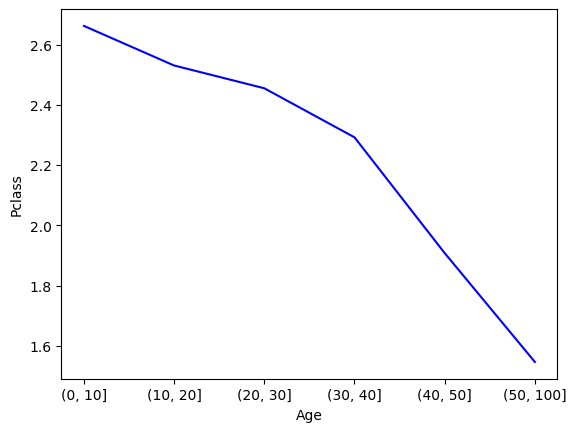

In [38]:
plt.plot(age_['Index'], age_['Pclass'], 'b-')
plt.xlabel('Age')
plt.xticks(range(6), labels=['(0, 10]', '(10, 20]', '(20, 30]', '(30, 40]', '(40, 50]', '(50, 100]'])
plt.ylabel('Pclass')

Text(0, 0.5, 'Family')

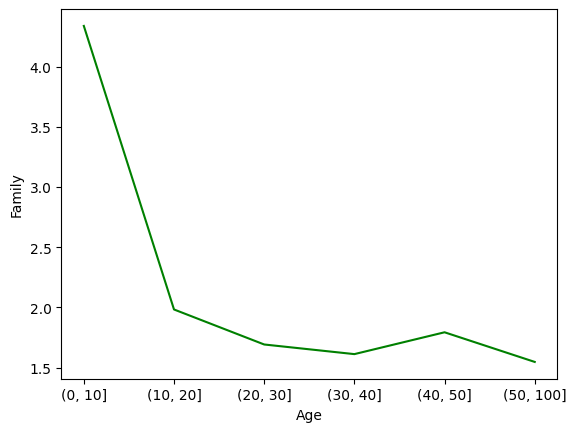

In [39]:
plt.plot(age_['Index'], age_['Family'], 'g-')
plt.xlabel('Age')
plt.xticks(range(6), labels=['(0, 10]', '(10, 20]', '(20, 30]', '(30, 40]', '(40, 50]', '(50, 100]'])
plt.ylabel('Family')

Text(0, 0.5, 'Single_Fare')

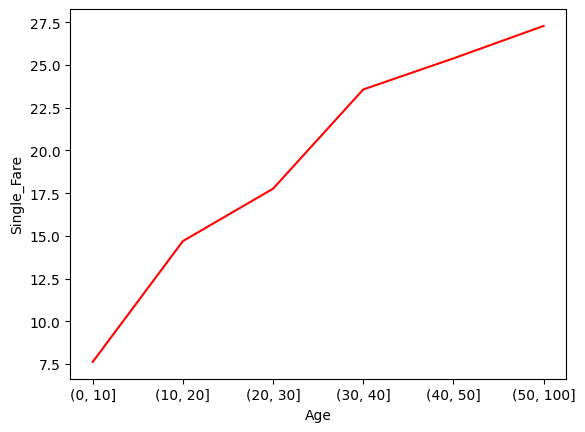

In [42]:
plt.plot(age_['Index'], age_['Single_Fare'], 'r-')
plt.xlabel('Age')
plt.xticks(range(6), labels=['(0, 10]', '(10, 20]', '(20, 30]', '(30, 40]', '(40, 50]', '(50, 100]'])
plt.ylabel('Single_Fare')

Text(0, 0.5, 'Survival_Rate')

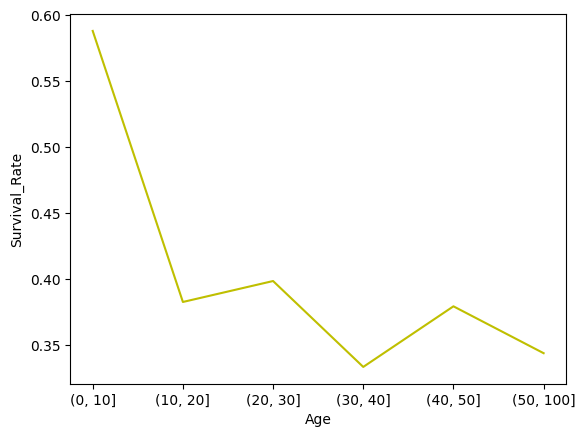

In [43]:
plt.plot(age_['Index'], age_['Survival_Rate'], 'y-')
plt.xlabel('Age')
plt.xticks(range(6), labels=['(0, 10]', '(10, 20]', '(20, 30]', '(30, 40]', '(40, 50]', '(50, 100]'])
plt.ylabel('Survival_Rate')

通过这四幅折线图，我们可以发现：

随着年龄的增大：
1. 票型越来越好
2. 家庭人数逐渐减少
3. 票价逐步上升
4. 生存率在(0, 10]时比较高，其他年龄段均相对较低

***因此年龄也是预测生存的重要特征之一***

## 三、初步构建模型

### 洗牌

In [60]:
data_shuffle = df1.sample(frac=1).reset_index(drop=True)
data_shuffle

,Survived,Pclass,Sex,Age,Ticket,Fare,Embarked,Family,Single_Fare
0,1,3,1,1.0,2315,20.5750,S,4,5.14375
1,0,1,1,47.0,111320,38.5000,S,1,38.50000
2,0,3,0,31.0,345763,18.0000,S,2,9.00000
3,0,1,1,31.0,17590,50.4958,S,1,50.49580
4,0,3,0,9.0,347088,27.9000,S,6,4.65000
...,...,...,...,...,...,...,...,...,...
886,0,3,1,33.0,7540,8.6542,S,1,8.65420
887,0,2,1,54.0,244252,26.0000,S,2,13.00000
888,0,3,1,24.0,48871,24.1500,S,3,8.05000
889,0,3,0,21.0,364846,7.7500,Q,1,7.75000


### 取出所需数据

Survived | Pclass、Sex、Age、Family、Single_Fare

In [61]:
X_train1 = data_shuffle[['Pclass', 'Sex', 'Age', 'Family', 'Single_Fare']]
y_train1 = data_shuffle['Survived']

In [62]:
X_train1

,Pclass,Sex,Age,Family,Single_Fare
0,3,1,1.0,4,5.14375
1,1,1,47.0,1,38.50000
2,3,0,31.0,2,9.00000
3,1,1,31.0,1,50.49580
4,3,0,9.0,6,4.65000
...,...,...,...,...,...
886,3,1,33.0,1,8.65420
887,2,1,54.0,2,13.00000
888,3,1,24.0,3,8.05000
889,3,0,21.0,1,7.75000


In [63]:
y_train1

0      1
1      0
2      0
3      0
4      0
      ..
886    0
887    0
888    0
889    0
890    0
Name: Survived, Length: 891, dtype: int64

### 标准化

In [64]:
from sklearn.preprocessing import StandardScaler
scaler1 = StandardScaler()
X_scaler1 = scaler1.fit_transform(X_train1)
X_scaler1

array([[ 0.82737724,  0.73769513, -2.16701397,  1.29942929, -0.41239965],
       [-1.56610693,  0.73769513,  1.30401325, -0.56097483,  0.51878934],
       [ 0.82737724, -1.35557354,  0.09669943,  0.05915988, -0.30474674],
       ...,
       [ 0.82737724,  0.73769513, -0.43150036,  0.67929458, -0.33126739],
       [ 0.82737724, -1.35557354, -0.6578717 , -0.56097483, -0.33964233],
       [ 0.82737724,  0.73769513, -0.35604325, -0.56097483, -0.35360057]])

### 模型构建

In [65]:
from sklearn.linear_model import LogisticRegression
clf1 = LogisticRegression().fit(X_scaler1, y_train1)
clf1

LogisticRegression()

## 四、模型评估

### 交叉验证

In [66]:
from sklearn.model_selection import cross_val_score
cv10 = cross_val_score(clf1, X_scaler1, y_train1, cv=10, scoring='accuracy')
cv10

array([0.8       , 0.78651685, 0.7752809 , 0.87640449, 0.84269663,
       0.79775281, 0.76404494, 0.70786517, 0.80898876, 0.85393258])

In [67]:
cv10.sum() / 10

np.float64(0.8013483146067415)

***交叉验证结果平均大约为 80%，模型仍需优化。***

### 混淆矩阵

In [68]:
y_pred1 = clf1.predict(X_scaler1)

In [69]:
from sklearn.metrics import confusion_matrix, classification_report
confusion_matrix(y_train1, y_pred1)

array([[471,  78],
       [ 98, 244]])

In [70]:
print(classification_report(y_train1, y_pred1))

              precision    recall  f1-score   support

           0       0.83      0.86      0.84       549
           1       0.76      0.71      0.73       342

    accuracy                           0.80       891
   macro avg       0.79      0.79      0.79       891
weighted avg       0.80      0.80      0.80       891



***准确性 = 80%***

***对于未生还的精度 = 84%***

***对于生还的精度 = 73%（数据存在轻微不平衡，负类样本更多。）***

### AUC | ROC

In [72]:
y_proba1 = clf1.predict_proba(X_scaler1)[:, 1]

In [73]:
from sklearn.metrics import roc_auc_score, roc_curve
roc_auc_score(y_train1, y_proba1)

np.float64(0.8594680386454905)

Text(0, 0.5, 'TPR')

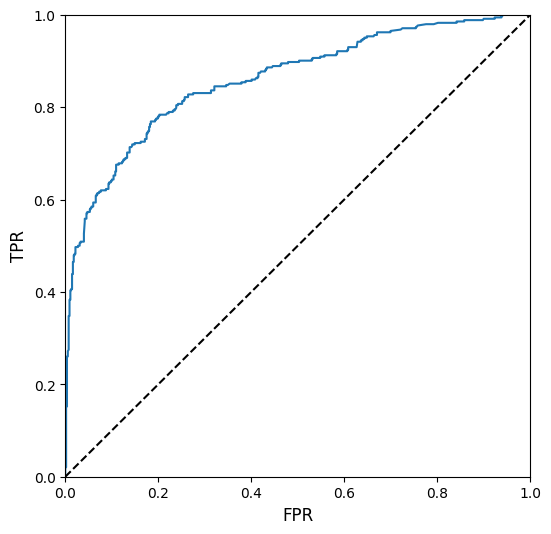

In [74]:
fpr, tpr, thresholds = roc_curve(y_train1, y_proba1)
plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], 'k--')
plt.axis((0, 1, 0, 1))
plt.xlabel('FPR', fontsize=12)
plt.ylabel('TPR', fontsize=12)

***AUC = 0.86 模型区分能力较好***

***ROC曲线表现较好，模型具有一定的泛化能力。***

**80% 的准确率对实际预测可能更低，生还的准确率较低。**

## 五、模型优化

### 尝试加入 Ticket | Fare

**票号(Ticket)** 能够间接反映乘客在船上的位置

**票价(Fare)** 或称为家庭票价，能够间接印证家庭团体的力量

In [75]:
X_train2 = data_shuffle[['Pclass', 'Sex', 'Age', 'Family', 'Fare', 'Single_Fare', 'Ticket']]
y_train2 = data_shuffle['Survived']
X_train2

,Pclass,Sex,Age,Family,Fare,Single_Fare,Ticket
0,3,1,1.0,4,20.5750,5.14375,2315
1,1,1,47.0,1,38.5000,38.50000,111320
2,3,0,31.0,2,18.0000,9.00000,345763
3,1,1,31.0,1,50.4958,50.49580,17590
4,3,0,9.0,6,27.9000,4.65000,347088
...,...,...,...,...,...,...,...
886,3,1,33.0,1,8.6542,8.65420,7540
887,2,1,54.0,2,26.0000,13.00000,244252
888,3,1,24.0,3,24.1500,8.05000,48871
889,3,0,21.0,1,7.7500,7.75000,364846


In [76]:
from sklearn.preprocessing import StandardScaler
scaler2 = StandardScaler()
X_scaler2 = scaler2.fit_transform(X_train2)
X_scaler2

array([[ 0.82737724,  0.73769513, -2.16701397, ..., -0.23415046,
        -0.41239965, -0.45141199],
       [-1.56610693,  0.73769513,  1.30401325, ...,  0.1267638 ,
         0.51878934, -0.2851867 ],
       [ 0.82737724, -1.35557354,  0.09669943, ..., -0.28599728,
        -0.30474674,  0.0723231 ],
       ...,
       [ 0.82737724,  0.73769513, -0.43150036, ..., -0.16216896,
        -0.33126739, -0.38041722],
       [ 0.82737724, -1.35557354, -0.6578717 , ..., -0.49237783,
        -0.33964233,  0.1014234 ],
       [ 0.82737724,  0.73769513, -0.35604325, ..., -0.50244517,
        -0.35360057,  0.11673524]])

In [77]:
from sklearn.linear_model import LogisticRegression
clf2 = LogisticRegression().fit(X_scaler2, y_train2)
clf2

LogisticRegression()

In [78]:
from sklearn.model_selection import cross_val_score
cv10 = cross_val_score(clf2, X_scaler2, y_train2, cv=10, scoring='accuracy')
cv10

array([0.81111111, 0.78651685, 0.7752809 , 0.87640449, 0.85393258,
       0.80898876, 0.76404494, 0.70786517, 0.75280899, 0.85393258])

In [79]:
cv10.sum() / 10

np.float64(0.7990886392009988)

***事实证明，没多大作用***

Embarked 的加入也不必去尝试了

### 尝试数据分组占比化

In [80]:
data3 = pd.concat([
    df1['Survived'], 
    df1['Pclass'].transform(lambda x: pclass.loc[x]['Survival_Rate']), 
    df1['Sex'].transform(lambda x: sex.loc[x]['Survival_Rate']), 
    age_layer['Age_Layer'].transform(lambda x: age_.loc[x]['Survival_Rate']), 
    df1['Family'].transform(lambda x: family.loc[x]['Survival_Rate']), 
    single_fare_layer['Single_Fare_Layer'].transform(lambda x: single_fare.loc[x]['Survival_Rate'])
], axis=1)
data3

,Survived,Pclass,Sex,Age_Layer,Family,Single_Fare_Layer
0,0,0.242363,0.188908,0.398496,0.552795,0.34901
1,1,0.629630,0.742038,0.333333,0.552795,0.34901
2,1,0.242363,0.742038,0.398496,0.303538,0.34901
3,1,0.629630,0.742038,0.333333,0.552795,0.34901
4,0,0.242363,0.188908,0.333333,0.303538,0.34901
...,...,...,...,...,...,...
886,0,0.472826,0.188908,0.398496,0.303538,0.34901
887,1,0.629630,0.742038,0.382609,0.303538,0.34901
888,0,0.242363,0.742038,0.398496,0.724138,0.34901
889,1,0.629630,0.188908,0.398496,0.303538,0.34901


In [86]:
data_shuffle3 = data3.sample(frac=1).reset_index(drop=True)
data_shuffle3

,Survived,Pclass,Sex,Age_Layer,Family,Single_Fare_Layer
0,0,0.472826,0.188908,0.398496,0.303538,0.34901
1,0,0.629630,0.188908,0.379310,0.552795,0.34901
2,0,0.242363,0.188908,0.333333,0.578431,0.34901
3,1,0.472826,0.742038,0.398496,0.303538,0.34901
4,0,0.242363,0.188908,0.333333,0.303538,0.34901
...,...,...,...,...,...,...
886,1,0.472826,0.742038,0.379310,0.303538,0.34901
887,0,0.242363,0.188908,0.343750,0.303538,0.34901
888,1,0.242363,0.742038,0.398496,0.303538,0.34901
889,0,0.242363,0.188908,0.333333,0.552795,0.34901


In [87]:
X_train3 = data_shuffle3[['Pclass', 'Sex', 'Age_Layer', 'Family', 'Single_Fare_Layer']]
y_train3 = data_shuffle3['Survived']

In [88]:
from sklearn.linear_model import LogisticRegression
clf3 = LogisticRegression().fit(X_train3, y_train3)
clf3

LogisticRegression()

In [89]:
from sklearn.model_selection import cross_val_score
cv10 = cross_val_score(clf3, X_train3, y_train3, cv=10, scoring='accuracy')
cv10

array([0.82222222, 0.80898876, 0.87640449, 0.75280899, 0.79775281,
       0.85393258, 0.76404494, 0.80898876, 0.7752809 , 0.80898876])

In [90]:
cv10.sum() / 10

np.float64(0.8069413233458176)

In [91]:
y_pred3 = clf3.predict(X_train3)

In [92]:
from sklearn.metrics import confusion_matrix, classification_report
confusion_matrix(y_train3, y_pred3)

array([[477,  72],
       [ 99, 243]])

In [93]:
print(classification_report(y_train3, y_pred3))

              precision    recall  f1-score   support

           0       0.83      0.87      0.85       549
           1       0.77      0.71      0.74       342

    accuracy                           0.81       891
   macro avg       0.80      0.79      0.79       891
weighted avg       0.81      0.81      0.81       891



***好像也没多大作用，准确率就增加了 1%***

### 尝试加入 Ticket | Fare | Embarked

In [94]:
fare_layer = df1[['Fare', 'Survived']].copy()
bins = np.linspace(-10, 520, 11)
fare_layer['Fare_Layer'] = pd.cut(fare_layer['Fare'], bins=bins)
fare = fare_layer.groupby('Fare_Layer', observed=False).agg({'Survived': 'sum', 'Fare_Layer': 'count'})
fare['Survival_Rate'] = fare['Survived'] / fare['Fare_Layer']
fare

,Survived,Fare_Layer,Survival_Rate
Fare_Layer,,,
"(-10.0, 43.0]",231,720,0.320833
"(43.0, 96.0]",72,118,0.610169
"(96.0, 149.0]",19,24,0.791667
"(149.0, 202.0]",6,9,0.666667
"(202.0, 255.0]",7,11,0.636364
"(255.0, 308.0]",4,6,0.666667
"(308.0, 361.0]",0,0,NaN
"(361.0, 414.0]",0,0,NaN
"(414.0, 467.0]",0,0,NaN


In [95]:
data4 = pd.concat([
    df1['Survived'], 
    df1['Pclass'].transform(lambda x: pclass.loc[x]['Survival_Rate']), 
    df1['Sex'].transform(lambda x: sex.loc[x]['Survival_Rate']), 
    age_layer['Age_Layer'].transform(lambda x: age_.loc[x]['Survival_Rate']), 
    df1['Family'].transform(lambda x: family.loc[x]['Survival_Rate']), 
    single_fare_layer['Single_Fare_Layer'].transform(lambda x: single_fare.loc[x]['Survival_Rate']), 
    ticket['Ticket_layer'].transform(lambda x: ticket_.loc[x]['Survival_Rate']), 
    fare_layer['Fare_Layer'].transform(lambda x: fare.loc[x]['Survival_Rate']), 
    df1['Embarked'].transform(lambda x: embarked.loc[x]['Survival_Rate']), 
], axis=1)
data4

,Survived,Pclass,Sex,Age_Layer,Family,Single_Fare_Layer,Ticket_layer,Fare_Layer,Embarked
0,0,0.242363,0.188908,0.398496,0.552795,0.34901,0.377778,0.320833,0.336957
1,1,0.629630,0.742038,0.333333,0.552795,0.34901,0.651007,0.610169,0.558824
2,1,0.242363,0.742038,0.398496,0.303538,0.34901,0.272727,0.320833,0.336957
3,1,0.629630,0.742038,0.333333,0.552795,0.34901,0.513889,0.610169,0.336957
4,0,0.242363,0.188908,0.333333,0.303538,0.34901,0.240000,0.320833,0.336957
...,...,...,...,...,...,...,...,...,...
886,0,0.472826,0.188908,0.398496,0.303538,0.34901,0.000000,0.320833,0.336957
887,1,0.629630,0.742038,0.382609,0.303538,0.34901,0.513889,0.320833,0.336957
888,0,0.242363,0.742038,0.398496,0.724138,0.34901,0.316092,0.320833,0.336957
889,1,0.629630,0.188908,0.398496,0.303538,0.34901,0.513889,0.320833,0.558824


In [96]:
data_shuffle4 = data4.sample(frac=1).reset_index(drop=True)
data_shuffle4

,Survived,Pclass,Sex,Age_Layer,Family,Single_Fare_Layer,Ticket_layer,Fare_Layer,Embarked
0,0,0.242363,0.188908,0.333333,0.303538,0.349010,0.140625,0.320833,0.336957
1,0,0.242363,0.188908,0.333333,0.552795,0.349010,0.240000,0.320833,0.389610
2,0,0.472826,0.742038,0.398496,0.303538,0.349010,0.500000,0.320833,0.336957
3,0,0.242363,0.188908,0.398496,0.303538,0.349010,0.200000,0.320833,0.336957
4,0,0.629630,0.188908,0.398496,0.303538,0.688525,0.651007,0.610169,0.558824
...,...,...,...,...,...,...,...,...,...
886,0,0.242363,0.188908,0.398496,0.303538,0.349010,0.140625,0.320833,0.336957
887,1,0.472826,0.188908,0.588235,0.724138,0.349010,0.444444,0.320833,0.336957
888,1,0.472826,0.742038,0.343750,0.200000,0.349010,0.377778,0.320833,0.336957
889,0,0.472826,0.188908,0.333333,0.303538,0.349010,0.316092,0.320833,0.336957


In [97]:
X_train4 = data_shuffle4[['Pclass', 'Sex', 'Age_Layer', 'Family', 'Single_Fare_Layer', 'Ticket_layer', 'Fare_Layer', 'Embarked']]
y_train4 = data_shuffle4['Survived']

In [98]:
from sklearn.linear_model import LogisticRegression
clf4 = LogisticRegression().fit(X_train4, y_train4)
clf4

LogisticRegression()

In [99]:
from sklearn.model_selection import cross_val_score
cv10 = cross_val_score(clf4, X_train4, y_train4, cv=10, scoring='accuracy')
cv10

array([0.78888889, 0.80898876, 0.86516854, 0.78651685, 0.85393258,
       0.7752809 , 0.86516854, 0.82022472, 0.76404494, 0.79775281])

In [100]:
cv10.sum() / 10

np.float64(0.8125967540574284)

In [101]:
y_pred4 = clf4.predict(X_train4)

In [102]:
from sklearn.metrics import confusion_matrix, classification_report
confusion_matrix(y_train4, y_pred4)

array([[487,  62],
       [100, 242]])

In [103]:
print(classification_report(y_train4, y_pred4))

              precision    recall  f1-score   support

           0       0.83      0.89      0.86       549
           1       0.80      0.71      0.75       342

    accuracy                           0.82       891
   macro avg       0.81      0.80      0.80       891
weighted avg       0.82      0.82      0.82       891



In [104]:
y_proba4 = clf4.predict_proba(X_train4)[:, 1]

In [105]:
from sklearn.metrics import roc_auc_score, roc_curve
roc_auc_score(y_train4, y_proba4)

np.float64(0.8646369262561382)

Text(0, 0.5, 'TPR')

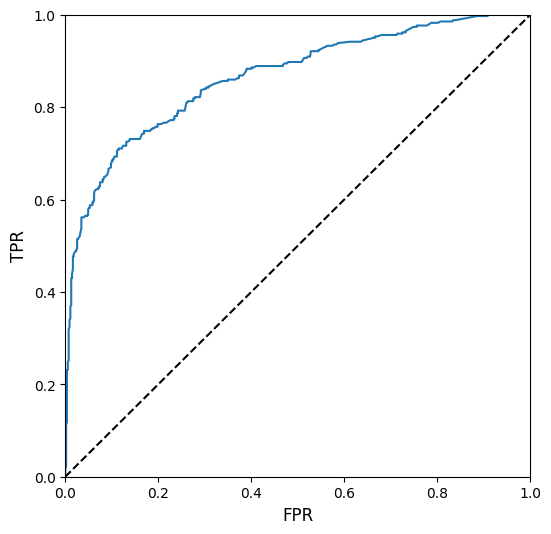

In [106]:
fpr, tpr, thresholds = roc_curve(y_train4, y_proba4)
plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], 'k--')
plt.axis((0, 1, 0, 1))
plt.xlabel('FPR', fontsize=12)
plt.ylabel('TPR', fontsize=12)

***收效甚微***

## 六、提交答案

### 数据预处理

In [107]:
lack = [k for k in df2.columns if df2[k].isna().any()]
lack

['Age', 'Fare', 'Cabin']

In [108]:
df2['Name'] = df2['Name'].map(lambda x: x.split(',')[1].split('.')[0].strip())
age = []
for row in df2[['Name', 'Age']].itertuples(index=False):
    if pd.isna(row[1]):
        age.append(age_nan_values.loc[row[0]].values[0])
    else:
        age.append(row[1])
df2['Age'] = pd.Series(age)
df2

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,Mr,male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,Mrs,female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,Mr,male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,Mr,male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,Mrs,female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,Mr,male,32.0,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,Dona,female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,Mr,male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,Mr,male,32.0,0,0,359309,8.0500,NaN,S


In [109]:
total_mean = (df2['Fare'].mean() + df1['Fare'].mean()) / 2
df2['Fare'] = df2['Fare'].fillna(total_mean)
df2

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,Mr,male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,Mrs,female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,Mr,male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,Mr,male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,Mrs,female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,Mr,male,32.0,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,Dona,female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,Mr,male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,Mr,male,32.0,0,0,359309,8.0500,NaN,S


In [110]:
df2['Sex'] = (df2['Sex'] == 'male').astype(int)
df2['Family'] = df2['SibSp'] + df2['Parch'] + 1
df2 = df2.drop(['SibSp', 'Parch'], axis=1)
df2['Ticket'] = df2['Ticket'].map(lambda x: x.split(' ')[-1] if x != 'LINE' else 300000).astype(int)
df2['Single_Fare'] = df2['Fare'] / df2['Family']
df2

,PassengerId,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,Embarked,Family,Single_Fare
0,892,3,Mr,1,34.5,330911,7.8292,NaN,Q,1,7.829200
1,893,3,Mrs,0,47.0,363272,7.0000,NaN,S,2,3.500000
2,894,2,Mr,1,62.0,240276,9.6875,NaN,Q,1,9.687500
3,895,3,Mr,1,27.0,315154,8.6625,NaN,S,1,8.662500
4,896,3,Mrs,0,22.0,3101298,12.2875,NaN,S,3,4.095833
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,Mr,1,32.0,3236,8.0500,NaN,S,1,8.050000
414,1306,1,Dona,0,39.0,17758,108.9000,C105,C,1,108.900000
415,1307,3,Mr,1,38.5,3101262,7.2500,NaN,S,1,7.250000
416,1308,3,Mr,1,32.0,359309,8.0500,NaN,S,1,8.050000


In [111]:
X_text1 = pd.concat([
    df2['Pclass'].transform(lambda x: pclass.loc[x]['Survival_Rate']), 
    df2['Sex'].transform(lambda x: sex.loc[x]['Survival_Rate']), 
    df2['Age'].transform(lambda x: age_.loc[x]['Survival_Rate']), 
    df2['Family'].transform(lambda x: family.loc[x]['Survival_Rate']), 
    df2['Single_Fare'].transform(lambda x: single_fare.loc[x]['Survival_Rate']), 
    df2['Ticket'].transform(lambda x: ticket_.loc[x]['Survival_Rate']), 
    df2['Fare'].transform(lambda x: fare.loc[x]['Survival_Rate']), 
    df2['Embarked'].transform(lambda x: embarked.loc[x]['Survival_Rate']), 
], axis=1)
X_text1.columns = ['Pclass', 'Sex', 'Age_Layer', 'Family', 'Single_Fare_Layer', 'Ticket_layer', 'Fare_Layer', 'Embarked']
X_text1

,Pclass,Sex,Age_Layer,Family,Single_Fare_Layer,Ticket_layer,Fare_Layer,Embarked
0,0.242363,0.188908,0.333333,0.303538,0.349010,0.533333,0.320833,0.389610
1,0.242363,0.742038,0.379310,0.552795,0.349010,0.303030,0.320833,0.336957
2,0.472826,0.188908,0.343750,0.303538,0.349010,0.500000,0.320833,0.389610
3,0.242363,0.188908,0.398496,0.303538,0.349010,0.176471,0.320833,0.336957
4,0.242363,0.742038,0.398496,0.578431,0.349010,0.272727,0.320833,0.336957
...,...,...,...,...,...,...,...,...
413,0.242363,0.188908,0.333333,0.303538,0.349010,0.316092,0.320833,0.336957
414,0.629630,0.742038,0.333333,0.303538,0.833333,0.651007,0.791667,0.558824
415,0.242363,0.188908,0.333333,0.303538,0.349010,0.272727,0.320833,0.336957
416,0.242363,0.188908,0.333333,0.303538,0.349010,0.200000,0.320833,0.336957


### 预测并输出结果

In [112]:
Survived1 = pd.DataFrame(clf4.predict(X_text1), columns=['Survived'])
result1 = pd.concat([df2['PassengerId'], Survived1], axis=1)
result1

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [113]:
result1.to_csv('./../data/result1.csv', index=False)

![](./../img/score1.png)

***首次提交***

### 尝试较差的模型

In [114]:
X_text2 = X_text1[['Pclass', 'Sex', 'Age_Layer', 'Family', 'Single_Fare_Layer']]
Survived2 = pd.DataFrame(clf3.predict(X_text2), columns=['Survived'])
result2 = pd.concat([df2['PassengerId'], Survived2], axis=1)
result2

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [116]:
result2.to_csv('./../data/result2.csv', index=False)

![](./../img/score2.png)

***clf3 实际上竟然相较于 clf4 更好***

In [117]:
X_text3 = df2[['Pclass', 'Sex', 'Age', 'Family', 'Fare', 'Single_Fare', 'Ticket']]
scaler_test3 = StandardScaler()
X_scaler_test3 = scaler_test3.fit_transform(X_text3)
Survived3 = pd.DataFrame(clf2.predict(X_scaler_test3), columns=['Survived'])
result3 = pd.concat([df2['PassengerId'], Survived3], axis=1)
result3

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [118]:
result3.to_csv('./../data/result3.csv', index=False)

![](./../img/score3.png)

***clf2 与 clf4 的实际预测效果一致***

In [120]:
X_text4 = df2[['Pclass', 'Sex', 'Age', 'Family', 'Single_Fare']]
scaler_test4 = StandardScaler()
X_scaler_test4 = scaler_test4.fit_transform(X_text4)
Survived4 = pd.DataFrame(clf1.predict(X_scaler_test4), columns=['Survived'])
result4 = pd.concat([df2['PassengerId'], Survived4], axis=1)
result4

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [121]:
result4.to_csv('./../data/result4.csv', index=False)

![](./../img/score4.png)

***clf1 是真的最差的了***

## 七、总结学习

**首先**，从结果可以看出，训练到测试准确率是降低的，训练可能存在 **过拟合** (clf3 实际上竟然相较于 clf4 更好)。

在这个做项目的过程中，数据是需要 **填充的**、**处理的**、**组合的** 和 **分组分析的**，每一个不同的选择最终都可能出现不同的训练结果。

而且，在数据处理的过程中，也会有很多 **有趣的发现**，如：
1. 当时人们的称谓所代表的阶级
2. 上层社会的主仆关系
3. 不同地区的贫富差距
4. 三等票所代表的底层人的悲哀
5. 家庭成员众多，但在生存问题上的人性自私
6. 性别与年龄在生存问题上的人性光辉

***当然，2 人的家庭生存率最高，这可能就是爱情吧！***

总结的时候又突然有了点想法，就留给大家吧：

1. 训练集与测试集在数据预处理时是否应该放在一起处理，比如各称谓的平均年龄填充等。
2. 称谓是否也可以作为一个特征值？
3. 票号是否可以转换为位置特征？
4. 费用 ( Fare | Single_Fare ) 的分层是否过多，只分三层会不会更好？
5. 电影《泰坦尼克号》的男女主是否生存？

***这些是否可以提高准确率？***

在这次的学习中，**只是简单的运用了逻辑回归**，加上些许的数据预处理的小技巧。

如果说想要提升准确率，提升kaggle分数，那么可能就要需要学习更加高深的分类算法，如：**随机森林** | **树** | **神经网络** 等。

本人也是拿到了 **Kaggle的入门证书** （不知道有啥用）

![](./../img/Getting%20Started%20Competitor.png)

最后，知识是学无止境的，我也只是学习了些皮毛，通过这个 kaggle 项目进行一次逻辑回归的巩固练习，在未来我一定会有更好的办法去提升这次分数。

***感谢大家的观看！***